<a href="https://colab.research.google.com/github/HammadN98/Estudos-de-caso/blob/main/clusterizacao_Estudo_de_caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto de aprendizado do uso de tecnicas de agrupamento clusterizacao

## **Objetivo**: Agrupar clientes com base em seus comportamentos de compra para identificar perfils diferentes.



## Pergunta a ser respondida: **Como podemos dividir nossos clientes em grupos que tenham comportamento de compra semelhante?**

### 0.1 Reconhecimento dos dados

In [3]:
import pandas as pd

# Carregar o dataset
URL = "https://github.com/HammadN98/Estudos-de-caso/raw/refs/heads/main/Dados/Online_Retail.xlsx"
data = pd.read_excel(URL)

#data = pd.read_excel("/content/Online_Retail.xlsx")

# Visualizar as primeiras linhas do dataset
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
# Verificar informações do dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [5]:
# Descrever as estatísticas gerais
print(data.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


## 1. Pre-processamento dos dados

1. Verificar valores ausentes e lidar com eles se necessario
2. Verificar outliers e lidar com eles
2. Como algoritimos e clusterizacao(eg. K-Means e cluster hierarquico, e imagino que a maioria seja) sao sensiveis a escala, sera necessario deixar todas as variaveis a serem utilizadas na mesma escala.

In [6]:
# 1. Remover a coluna CustumerID
data.drop(columns=['CustomerID'], inplace=True)

1.1 Tratando dos valores negativos

Pergunta: O que sao esses valores mnegativos? Erros de entrada?

In [7]:

# Quantidade de negativos 'Quantity'
cont_negativos_quantidade = data[data['Quantity'] < 0].shape[0]

# Quantidade de negativos  'UnitPrice'
cont_negativos_preco = data[data['UnitPrice'] < 0].shape[0]

print(f"Quantidade de valores negativos em Quantity: {cont_negativos_quantidade}")
print(f"Quantidade de valores negativos em UnitPrice: {cont_negativos_preco}")

Quantidade de valores negativos em Quantity: 10624
Quantidade de valores negativos em UnitPrice: 2


In [9]:
#QUais ssao o valores negativos nas colunas?
negativo_uniprice = data[data['UnitPrice'] < 0]
negativo_uniprice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,United Kingdom


In [12]:
# vendo os regsitros entre 299980 e 299990
entre_80_90 = data.loc[299980:299990]
print(entre_80_90)

       InvoiceNo StockCode                        Description  Quantity  \
299980    563184    82494L        WOODEN FRAME ANTIQUE WHITE          4   
299981    563184     82482  WOODEN PICTURE FRAME WHITE FINISH         4   
299982   A563185         B                    Adjust bad debt         1   
299983   A563186         B                    Adjust bad debt         1   
299984   A563187         B                    Adjust bad debt         1   
299985    563188     79160      HEART SHAPE WIRELESS DOORBELL        48   
299986    563188     22728          ALARM CLOCK BAKELIKE PINK        12   
299987    563188     23108         SET OF 10 LED DOLLY LIGHTS         4   
299988    563188     23321        SMALL WHITE HEART OF WICKER        12   
299989    563188     23322        LARGE WHITE HEART OF WICKER         6   
299990    563188     21731      RED TOADSTOOL LED NIGHT LIGHT        12   

               InvoiceDate  UnitPrice         Country  
299980 2011-08-12 14:50:00       2.95  Unit

Esta valor negativo foi uma manobra para  contornar um registro anterior errado. Foi acrescido um valor de '11062.06' de maneira incorreta, e para contornar foi registrado um valor '-11062.06' e alem foi feito de maneira duplicada. Ou seja como ja se trata de um erro desde o inicio, e mais facil excluir os tres registros outliers e seguir descobrindo se tem mais.

In [13]:
data.drop([299982, 299983, 299984], inplace=True)

In [14]:
#Para seguir investigando a coluna
print(data['UnitPrice'].describe())

count    541906.000000
mean          4.631552
std          93.192775
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


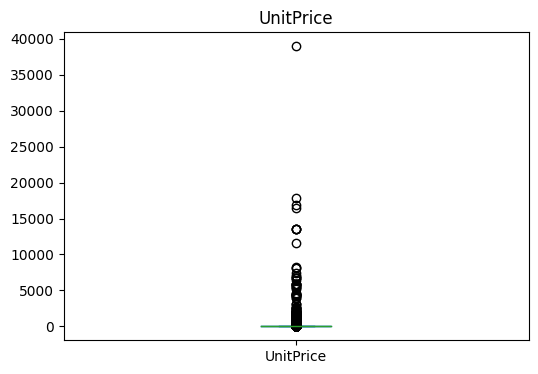

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

data['UnitPrice'].plot(kind='box')

plt.title('UnitPrice')
plt.show();

COm esse grafico aliado ao faot de ate 75% dos dados tem um valor ate 4.13 e possivel que aja muitos outliers ainda. A pesquisar

In [20]:
# Quantidade de cada valor em 'UnitPrice'
cont_unitprice = data['UnitPrice'].value_counts()
print(cont_unitprice)

UnitPrice
1.25      50496
1.65      38181
0.85      28497
2.95      27768
0.42      24533
          ...  
84.21         1
46.86         1
28.66         1
156.45        1
224.69        1
Name: count, Length: 1628, dtype: int64


"\n# Convertendo para DataFrame\nunitprice_counts_df = unitprice_counts.reset_index()\nunitprice_counts_df.columns = ['UnitPrice', 'Count']\n\n# Exibindo o DataFrame com contagens\nprint(unitprice_counts_df)"